<a href="https://colab.research.google.com/github/AlexsaTasara/PK_Machine_learning/blob/main/Tarasova_PK_14_10_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PK 14/10/22

bank
age - возраст клиента

job - работа клиента

marital - женат ли/ замужем ли

education - образование клиента

default

balance - счет клиента

housing - имеет ли дом

loan - имеет ли клиент задолжности

contact - контакт

day - день рождения клиента

month - месяц рождения клиента

duration - длительность

campaign - количество компаний

pdays - дней платежа

previous - предыдущий платеж

poutcome

y

In [1]:
# необходимые пакеты
import matplotlib.pyplot as plt
import seaborn as sns

import random 
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

# модели

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# дополнительные части моделей
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# metric
from sklearn.metrics import mean_absolute_error, r2_score # метрики регрессии 
# метрики для классификации
from sklearn.metrics import roc_auc_score, log_loss, precision_score,recall_score, precision_recall_curve,roc_curve, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving bank.csv to bank.csv


In [3]:
DATASET_PATH = 'bank.csv'

df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


**Предикторы - 'Age', 'Job', 'Marital', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Poutcome'**

**Целевая переменная - y**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [5]:
features = [  'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'

In [6]:
feature_num_i = [feat for feat in features if df[feat].dtype in ['int64','int32']]
feature_num_i

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Проверяем наличие пропусков

In [57]:
rez = pd.DataFrame(data = np.zeros(len(df.columns)).reshape(-1,1),index =df.columns,columns =['пропусков'])
for name_ in df.columns:
    n_ = df[name_].isnull().sum()
    rez.loc[name_,['пропусков']] = n_
    if (n_)>0:
        print('в признаке', name_,' обнаружено ', n_, ' пропусков')
    else:
        print('в признаке', name_,' обнаружено 0 пропусков')   

в признаке age  обнаружено 0 пропусков
в признаке job  обнаружено 0 пропусков
в признаке marital  обнаружено 0 пропусков
в признаке education  обнаружено 0 пропусков
в признаке default  обнаружено 0 пропусков
в признаке balance  обнаружено 0 пропусков
в признаке housing  обнаружено 0 пропусков
в признаке loan  обнаружено 0 пропусков
в признаке contact  обнаружено 0 пропусков
в признаке day  обнаружено 0 пропусков
в признаке month  обнаружено 0 пропусков
в признаке duration  обнаружено 0 пропусков
в признаке campaign  обнаружено 0 пропусков
в признаке pdays  обнаружено 0 пропусков
в признаке previous  обнаружено 0 пропусков
в признаке poutcome  обнаружено 0 пропусков
в признаке y  обнаружено 0 пропусков


Пропусков нет

**Распределение числовых признаков:**

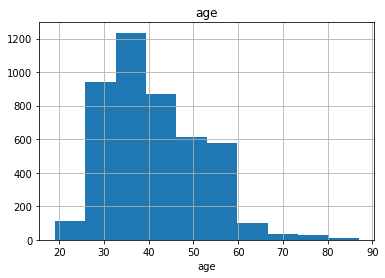

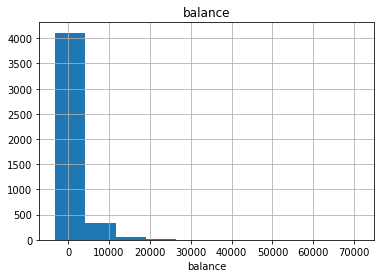

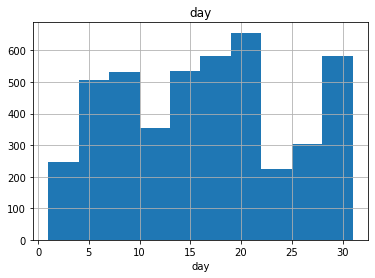

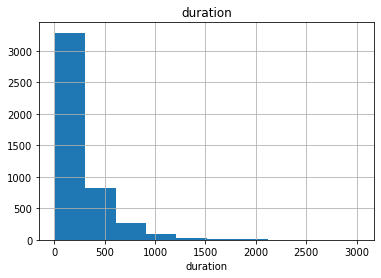

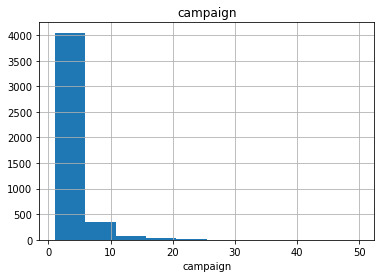

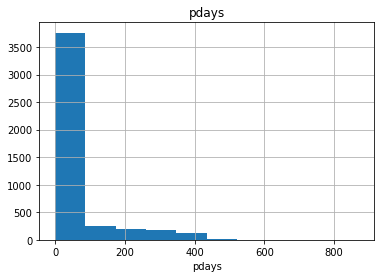

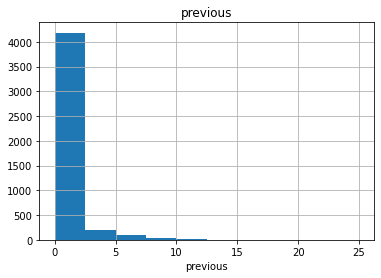

In [7]:
for name in feature_num_i:
    try:
        plt.hist(df[name])
        plt.grid()
        plt.title(name)
        plt.xlabel(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')     

**Вывод: day категорийный признак. Остальные графики удовлетворяют требованиям**

In [8]:
feature_cat = [feat for feat in features if df[feat].dtype not in ['int64','float64']]+['day']
feature_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'day']

In [9]:
feature_num = [  'age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
feature_num

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

**Определение числа признаков:**

In [10]:
for name in feature_cat:
    print( name,': число категорий: ' ,len(df.loc[:, name].unique()))

job : число категорий:  12
marital : число категорий:  3
education : число категорий:  4
default : число категорий:  2
housing : число категорий:  2
loan : число категорий:  2
contact : число категорий:  3
month : число категорий:  12
poutcome : число категорий:  4
day : число категорий:  31


In [11]:
for name in feature_cat:
    print('признак ',name,':')
    print(df.loc[:, name ].value_counts())

признак  job :
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
признак  marital :
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
признак  education :
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
признак  default :
no     4445
yes      76
Name: default, dtype: int64
признак  housing :
yes    2559
no     1962
Name: housing, dtype: int64
признак  loan :
no     3830
yes     691
Name: loan, dtype: int64
признак  contact :
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
признак  month :
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype:

**Вывод: действий с категорийными признаками не требуется**

**Разделим данные на тестовые и тренировочные**

In [13]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

(3390, 1)
(3390, 1)
(3390, 1)
(3390, 1)
(3390, 1)
(3390, 1)


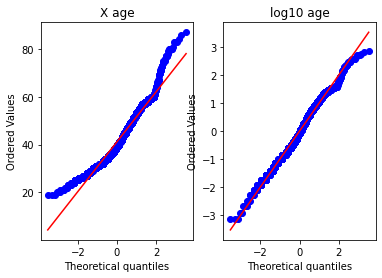

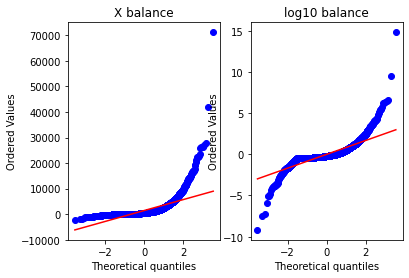

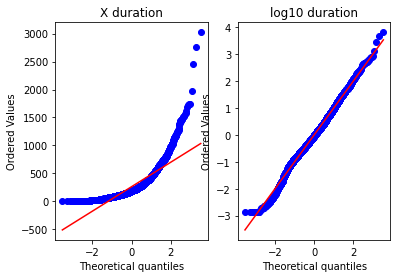

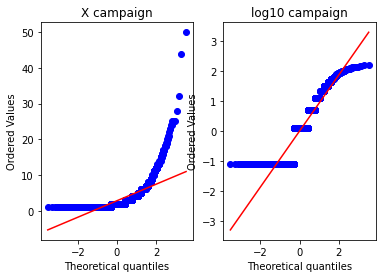

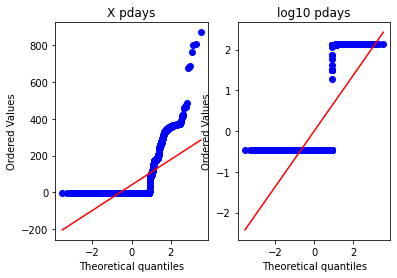

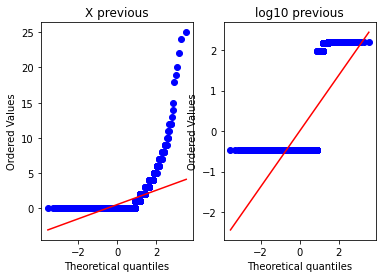

In [14]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

for name in feature_num:
    try:
        vPower = PowerTransformer().fit(X_train[name].values.reshape(-1,1)+1)
        yv = vPower.transform(X_train[name].values.reshape(-1,1)+1)
        print(yv.shape)
        fig1, (ax1, ax2) = plt.subplots(1,2)
        p12 = stats.probplot(X_train[name], dist=stats.norm, plot=ax1)
        p22 = stats.probplot(yv[:,0], dist=stats.norm, plot=ax2)
        ax1.set_title('X '+name)
        ax2.set_title('log10 '+name)

    except:
        print('для ',name,' ошибка работы')

**Вывод: данные pdays, previous не нормальны.**

In [15]:
X1 =X_train.loc[y_train == 1, :]
X0 =X_train.loc[y_train == 0, :]

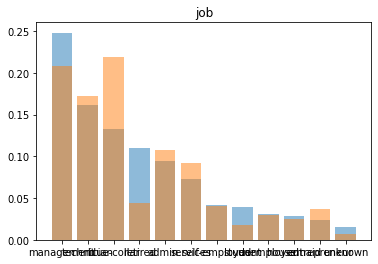

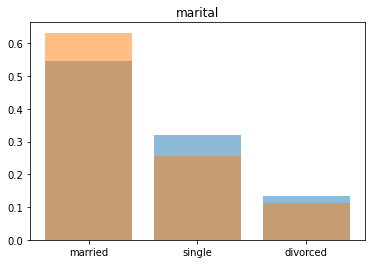

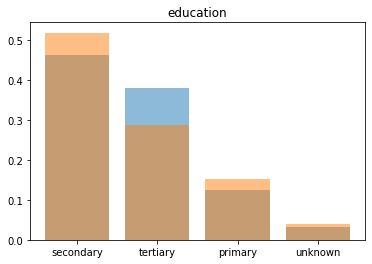

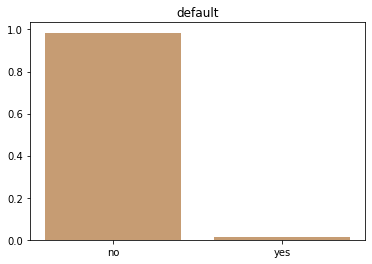

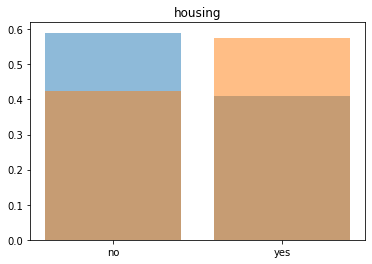

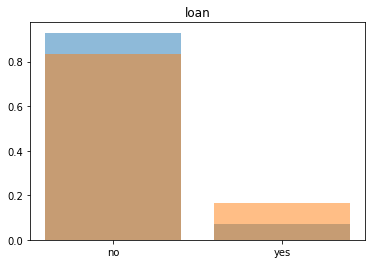

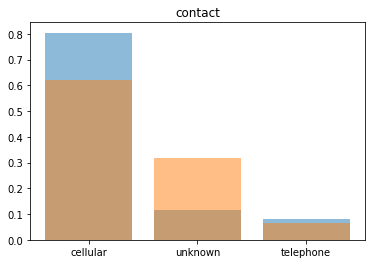

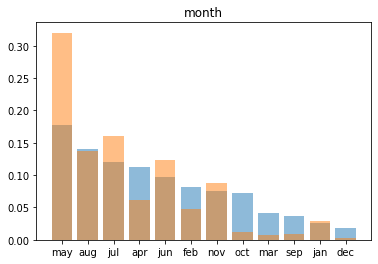

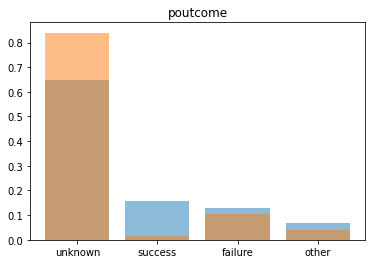

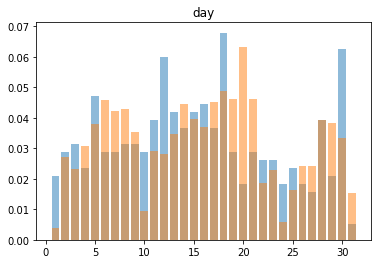

In [16]:
for name in feature_cat:
    try:
        b1 = X1[name].value_counts(normalize=True)
        b0 = X0[name].value_counts(normalize=True)
        plt.bar(b1.index,b1.values, alpha=0.5)
        plt.bar(b0.index,b0.values, alpha=0.5)
        plt.title(name)
        plt.show()
    except:
        print('для ',name,' ошибка работы')

**Вывод: данные сбалансированы, действий не требуется**

# Создание модели

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class preprocess_data2(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self):
        
        self.median_age = 0
        self.AgePower = PowerTransformer()
        self.SPower = PowerTransformer()
        self.FPower = PowerTransformer()
        self.cat = []
 
    def fit(self, X, y=None):
        self.cat = [feat for feat in X.columns if X[feat].dtype not in ['int64','float64']]
        X.loc[:, self.cat] = X.loc[:, self.cat].astype(str)

        return self

    def transform(self, X):
        X.loc[:, self.cat] = X.loc[:, self.cat].astype(str)
        
        X['age']=self.AgePower.transform(X['age'].values.reshape(-1,1)+1)
        X['balance'] = self.SPower.transform(X['balance'].values.reshape(-1,1)+1)
        X['duration'] = self.FPower.transform(X['duration'].values.reshape(-1,1)+1)
        X['campaign']=self.AgePower.transform(X['campaign'].values.reshape(-1,1)+1)
        X['pdays'] = self.SPower.transform(X['pdays'].values.reshape(-1,1)+1)
        X['previous'] = self.FPower.transform(X['previous'].values.reshape(-1,1)+1)

        self.median_age = X[imputer_list[0]].median()
       
        return X

**Удалим из тестовых и тренировочных данных для удобства все признаки типа object**

In [22]:
X_train.drop('job',axis=1,inplace=True)
X_test.drop('job',axis=1,inplace=True)

X_train.drop('marital',axis=1,inplace=True)
X_test.drop('marital',axis=1,inplace=True)

X_train.drop('education',axis=1,inplace=True)
X_test.drop('education',axis=1,inplace=True)

X_train.drop('default',axis=1,inplace=True)
X_test.drop('default',axis=1,inplace=True)

X_train.drop('housing',axis=1,inplace=True)
X_test.drop('housing',axis=1,inplace=True)

X_train.drop('loan',axis=1,inplace=True)
X_test.drop('loan',axis=1,inplace=True)

X_train.drop('contact',axis=1,inplace=True)
X_test.drop('contact',axis=1,inplace=True)

X_train.drop('month',axis=1,inplace=True)
X_test.drop('month',axis=1,inplace=True)

X_train.drop('poutcome',axis=1,inplace=True)
X_test.drop('poutcome',axis=1,inplace=True)


**В качестве моделей выбираем случайный лес, градиентный бустинг, ближайший сосед и логистическую регрессию**

In [23]:
RF =  RandomForestClassifier()
GB = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
LM = LogisticRegression()
SV = SVC(gamma='auto',probability=True)
cls_= ['RF','GB','KNN','LM','SV']

list_class = {"cls":[RF,GB,KNN,LM,SV],'metric':[0,0,0,0,0]}

Произведём селекцию моделей

RF : : 0.8549557044237196
GB : : 0.870466453580863
KNN : : 0.733752207481355
LM : : 0.8360698804676212
SV : : 0.3970912328327277


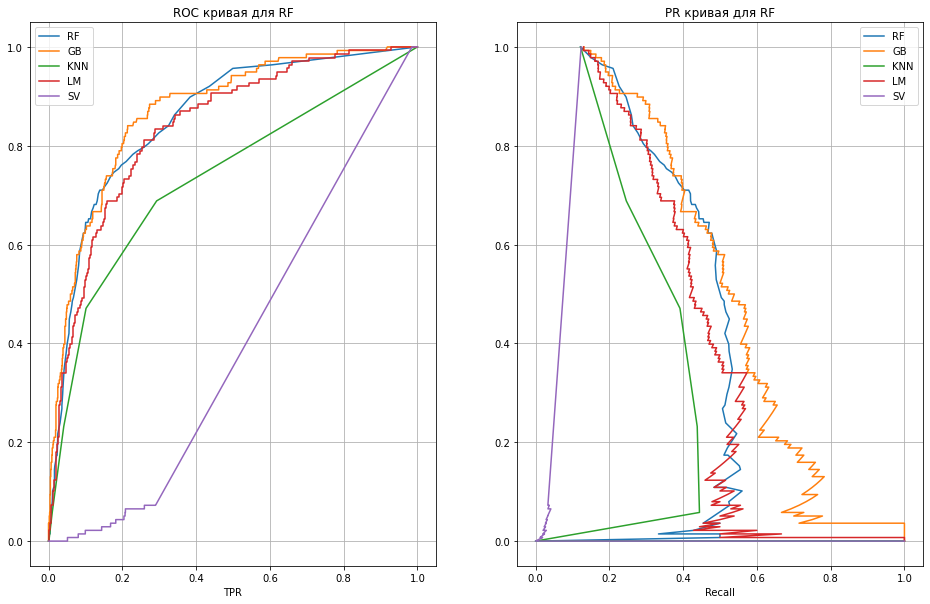

In [24]:
plt.figure(figsize =(16,10))
for i,model in enumerate(list_class["cls"]):
    yp = model.fit(X_train,y_train).predict_proba(X_test)[:,1]
    list_class['metric'][i] = roc_auc_score(y_test,yp)
    p,r,t = roc_curve(y_test,yp)
    plt.subplot(1,2,1)
    plt.plot(p,r,label = cls_[i])
    p,r,t = precision_recall_curve(y_test,yp)
    plt.subplot(1,2,2)
    plt.plot(p,r,label = cls_[i])
    print(cls_[i],": :",list_class['metric'][i]) 
plt.subplot(1,2,1)    
plt.title('ROC кривая для RF')
plt.grid(True)
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.legend()
plt.subplot(1,2,2)    
plt.title('PR кривая для RF')
plt.grid(True)
plt.xlabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()
    
    

**Лушей моделью оказался градиентный бустинг**

**Показатели случайного леса и логистического регрессии оказались близки к модели градиентного бустинга, а ближайший сосед имеет плохие показатели**

**Вывод: в результате была выбрана модель градиентного бустинга**

In [26]:
GB = GradientBoostingClassifier(n_estimators=50, random_state=413)
GB.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=413)

In [27]:
GB.score(X_test, y_test)

0.8912466843501327

In [28]:

rez = np.zeros((10,10))

for i,n_tree in enumerate(np.linspace(1,500,10)): # варианты числа градиентного бустинга
    for j,deep_tree in enumerate(np.linspace(1,10,10)): # варианты глубины градиентного бустинга
        GB = GradientBoostingClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
        yp = GB.fit(X_train,y_train).predict_proba(X_test)[:,1]
        
        rez[i,j] = roc_auc_score(y_test,yp) # сохраняем метрику на отложенной выборке
        print(rez[i,j]) #из за большой глубины дерева медленная загрузка. Результаты печатаются, что бы видеть что все работает.
        del GB
        

0.6638316038355444
0.7901688632018331
0.8215150984427222
0.8168994556095568
0.8226753944276602
0.8471839105623422
0.8265284527927376
0.8250507173402221
0.7895193893486288
0.7622706773501466
0.8493658508107476
0.8609359720945167
0.8693389961615365
0.868164105258549
0.86876249689858
0.864398616401769
0.8632018331217072
0.8636323832041682
0.8501795174920093
0.84748675511187
0.8582468584438898
0.8667119109126202
0.8706415925974575
0.8632164280397565
0.8634827852941607
0.8550286790139674
0.8510588613044936
0.8529707955689828
0.8567362844257629
0.8477093276121255
0.862194783776289
0.8666498825109097
0.8666060977567612
0.8627347957441219
0.8566560123764905
0.8513215698293854
0.8471839105623422
0.851927258928441
0.8507596654844783
0.8479939285140914
0.8637236014419779
0.86648204095334
0.8667775880438431
0.8595421574207862
0.8493147685975745
0.843885459083147
0.8520367208138127
0.8439803260504692
0.8453741407241998
0.8533502634382708
0.8643548316476203
0.8626143876702131
0.8650991724681465
0.85

**Визуалиция модели**

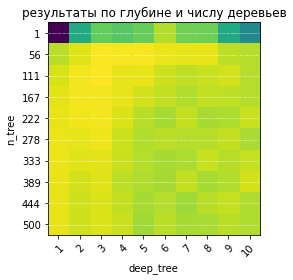

In [29]:
N_tree = 500
Deep_tree = 10

def plot_rez(rez,xlabel,ylabel,title,xyl = [[1,N_tree],[1,Deep_tree]]):
    
    fig, ax = plt.subplots()
    
    im = ax.imshow(rez)
    n = rez.shape
    # We want to show all ticks...
    ax.set_xticks(np.arange(n[1]))
    ax.set_yticks(np.arange(n[0]))
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # ... and label them with the respective list entries
    ax.set_yticklabels(np.linspace(xyl[0][0],xyl[0][1],n[0]).astype(int))
    ax.set_xticklabels(np.linspace(xyl[1][0],xyl[1][1],n[1]).astype(int))

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(n[0]):
        for j in range(n[1]):
            text = ax.text(j, i, rez[i, j],
                           ha="center", va="center", color="w",size=2)

    ax.set_title("результаты по глубине и числу деревьев")
    fig.tight_layout()
    
    plt.show()

plot_rez(rez,'deep_tree','n_tree','ROC_AUC от числа деревьев и их глубины',xyl = [[1,500],[1,10]]) 


**По данному графику можем наблюдать, что нам достаточно менее 56 деревьев с глубиной 3**

Создадим объект sklearn, который добавит  полиномиальные признаки

In [30]:
GB = GradientBoostingClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
yp = GB.fit(X_train,y_train).predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,yp))

0.8496650466307633


In [31]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
                            

In [32]:
X_poly.shape

(3390, 36)

In [33]:
GB = GradientBoostingClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
yp = GB.fit(X_poly,y_train).predict_proba(X_poly_test)[:,1]
print(roc_auc_score(y_test,yp))

0.8426011062947881


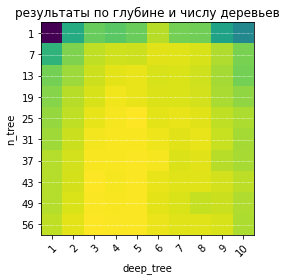

In [34]:
rez = np.zeros((10,10))

for i,n_tree in enumerate(np.linspace(1,56,10)): # варианты числа деревьев
    for j,deep_tree in enumerate(np.linspace(1,10,10)): # варианты глубины деревьев
        GB = GradientBoostingClassifier(max_depth=int(deep_tree),n_estimators=int(n_tree))
        yp = GB.fit(X_train,y_train).predict_proba(X_test)[:,1]
        
        rez[i,j] = roc_auc_score(y_test,yp) # сохраняем метрику на отложенной выборке
        del GB

plot_rez(rez,'deep_tree','n_tree','ROC_AUC от числа деревьев и их глубины',xyl = [[1,56],[1,10]]) 
      

**Произведём калибровку модели**

0.2286455989991486
0.12919463087248323


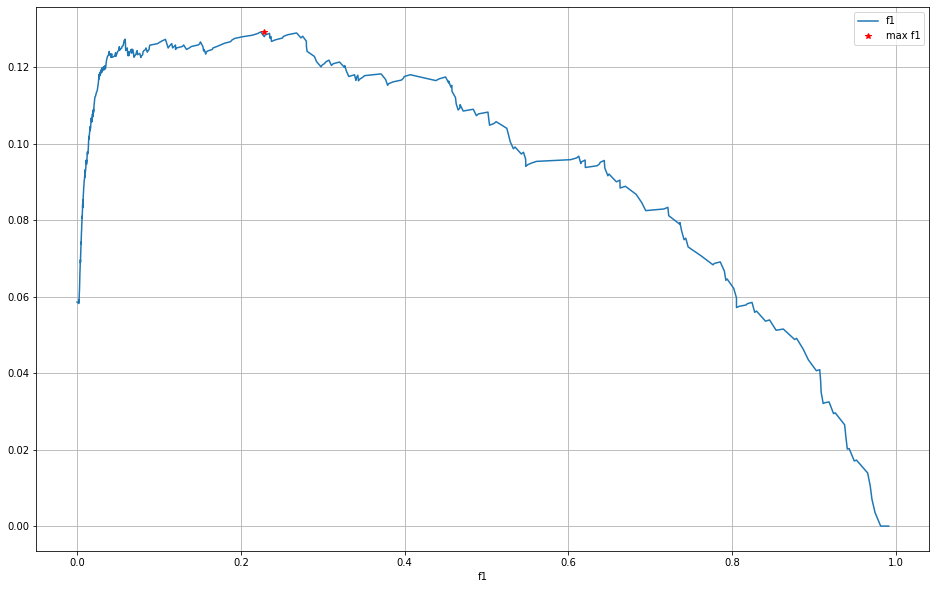

In [56]:
p,r,t = precision_recall_curve(y_test,yp)
# print(p)

f1 = p*r/2/(p+r)
for i in range(len(f1)):
  if np.isnan(f1[i]):
    f1[i] = 0

ind_tr = np.argmax(f1)
print(t[ind_tr])
print(f1[ind_tr])
plt.figure(figsize =(16,10))
plt.plot([0]+t.tolist(),f1, label = 'f1')
plt.plot(t[ind_tr],f1[ind_tr],'*r', label = 'max f1')
plt.xlabel('treshold')
plt.xlabel('f1')
plt.legend()
plt.grid(True)
plt.show()



Выводы:

  - причины выбора модели
  - качество данных : с пробелами, с выбросами, катекорийные/дискретные/непрерывные
  - результаты моделирования и.т.п.